<a href="https://colab.research.google.com/github/AditiHariB/1st-Project-Tkinter-Calculator/blob/main/Fishing_Choropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()
!pip install gcsfs


In [3]:
import pandas as pd
import gcsfs

In [4]:
fs = gcsfs.GCSFileSystem()

In [5]:
bucket_path = "adz-gf-bucket"


In [6]:
print("Listing files in bucket...")
files=fs.ls(bucket_path)
for f in files[:10]:
  print(f)

Listing files in bucket...
adz-gf-bucket/gs:


In [7]:
print(f"\nTotal files found: {len(files)}")



Total files found: 1


In [8]:
paths = [
    f"gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_{i:012d}.csv"
    for i in range(60)
]

In [9]:
print("\nLoading all CSV files from Cloud storage...")


Loading all CSV files from Cloud storage...


In [10]:
pd.read_csv(paths[0]).head()


,date,year,month,cell_ll_lat,cell_ll_lon,flag,geartype,hours,fishing_hours,mmsi_present
0,2018-06-01,2018,6,17.0,-51.4,VCT,drifting_longlines,1.1763,1.1763,1
1,2018-06-01,2018,6,-36.6,157.6,VUT,drifting_longlines,1.8433,1.8433,1
2,2018-06-01,2018,6,-22.8,-169.6,VUT,drifting_longlines,7.0161,7.0161,1
3,2018-06-01,2018,6,-14.1,-173.8,VUT,drifting_longlines,1.5663,1.5663,1
4,2018-06-01,2018,6,-1.7,149.0,VUT,drifting_longlines,3.1991,3.1991,1


In [11]:
dfs=[]

invasive_gears=[
    'trawlers',
    'set_longlines',
    'drifting_longlines',
    'gillnetters',
    'purse_seines'
]

print("\nLoading and filtering files...")


Loading and filtering files...


In [12]:
for p in paths:
  print('Loading:',p)
  chunk=pd.read_csv(p)

  filtered=chunk[chunk['geartype'].isin([
      'trawlers',
      'set_longlines',
      'drifting_longlines',
      'gillnetters',
      'purse_seines'
  ])]
  dfs.append(filtered)
df=pd.concat(dfs, ignore_index=True)
print('\nDone Loading!')
print(df.head())
print(df.shape)


Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000000.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000001.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000002.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000003.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000004.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000005.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000006.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000007.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000008.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000009.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000010.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000011.csv
Loading: gs://adz-gf-bucket/gs:/aditi-gf

In [13]:
import gcsfs
fs=gcsfs.GCSFileSystem()
files=fs.ls("gs://adz-gf-bucket/gs:/aditi-gfw-bucket/")
len(files), files[:10]


(60,
 ['adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000000.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000001.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000002.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000003.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000004.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000005.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000006.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000007.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000008.csv',
  'adz-gf-bucket/gs:/aditi-gfw-bucket/fleet_monthly_000000000009.csv'])

In [43]:
agg_country=df.groupby('flag')['fishing_hours'].sum().reset_index()
agg_country.head()

,flag,fishing_hours
0,ABW,4768.5366
1,AFG,12737.2530
2,AGO,379571.9508
3,AIA,7566.7555
4,ALB,430076.8177


In [38]:
agg_country=df.groupby('flag')['fishing_hours'].sum().reset_index()
agg_country.head()
!pip install geopandas

In [45]:
!unzip ne_110m_admin_0_countries.zip
import geopandas as gpd
world=gpd.read_file('ne_110m_admin_0_countries.zip')
world.head()

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countries.shx  


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [46]:
merged=world.merge(agg_country, left_on='ISO_A3', right_on='flag', how='left')
merged.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,flag,fishing_hours
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",FJI,9.400239e+05
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,2.594032e+03
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",CAN,1.700768e+06
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",USA,8.794476e+06


In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
merged.shape
world=world.set_geometry('geometry')
world=world.explode(index_parts=False)
merged=world.merge(agg_country, left_on='ISO_A3', right_on='flag', how='left')


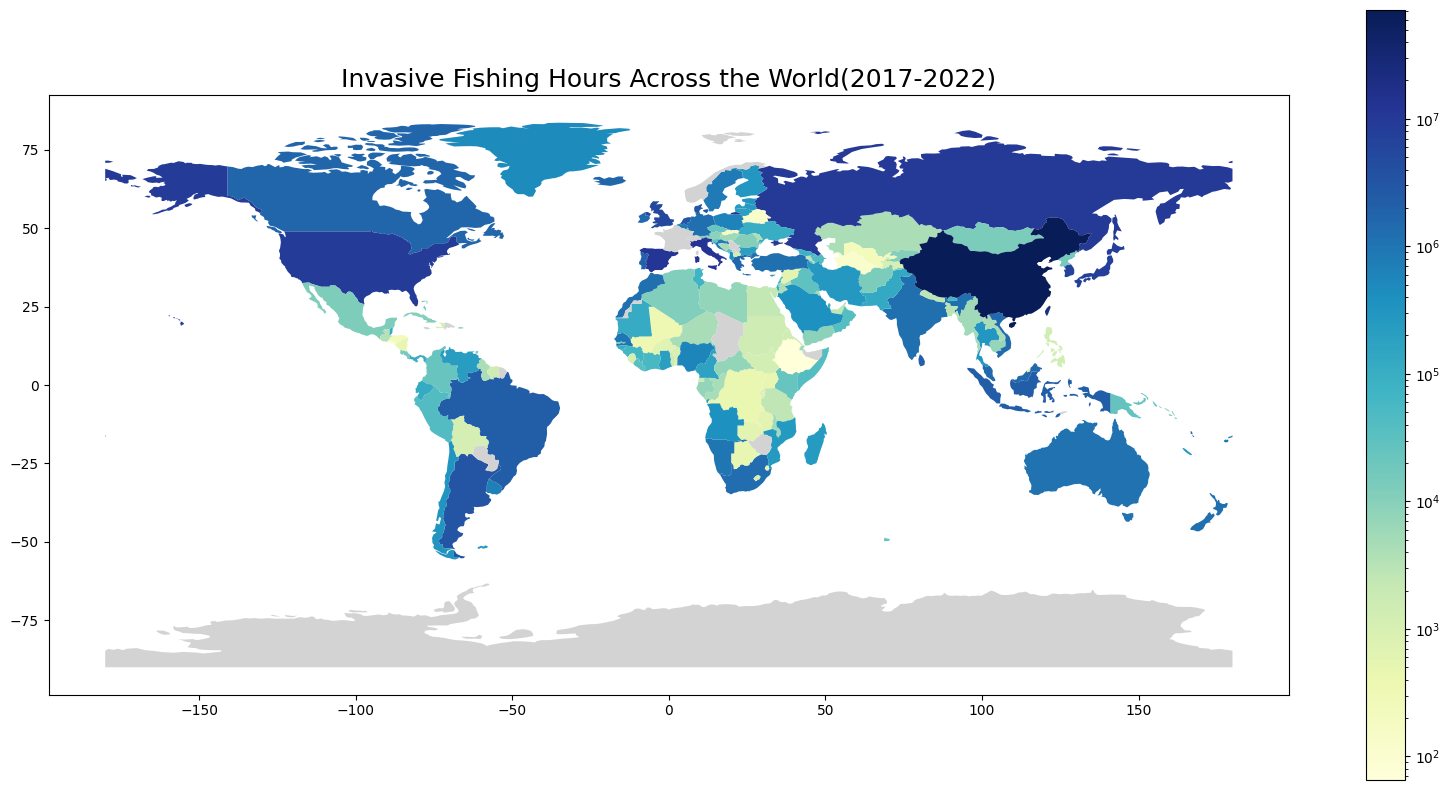

In [60]:
fig, ax=plt.subplots(1,1, figsize=(20,10))
merged.plot(
    column='fishing_hours',
    cmap='YlGnBu',
    norm=colors.LogNorm(),
    legend=True,
    ax=ax,
    missing_kwds={'color':'lightgrey','label':'No data'}
)
ax.set_title('Invasive Fishing Hours Across the World(2017-2022)',fontsize=18)
plt.show()

In [72]:
country_totals=(
    merged.groupby('ADMIN',as_index=False)['fishing_hours']
    .sum()
)
top10= (
    country_totals
    .sort_values('fishing_hours',ascending=False)
    .head(10)
)
top10

,ADMIN,fishing_hours
30,China,1.425606e+08
132,Russia,1.406266e+08
166,United States of America,8.794476e+07
26,Canada,5.102303e+07
75,Italy,3.587559e+07
70,Indonesia,2.820606e+07
78,Japan,2.412804e+07
152,Taiwan,1.999474e+07
145,Spain,1.174582e+07
164,United Kingdom,1.077850e+07
